In [1]:
import pandas as pd

billdf = pd.read_csv("../Data/summarized_bills.csv")

In [2]:
billdf

,Unnamed: 0.1,Unnamed: 0,Bill Number,Raw Text,summary
0,2,2,117hr1057enr,This Act may be cited as the The Congress find...,This Act may be cited as the The Congress find...
1,9,9,117hr1082enr,This Act may be cited as the Not later than 1 ...,This Act may be cited as the Not later than 1 ...
2,12,12,117hr1095enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...
3,16,16,117hr1154enr,This Act may be cited as the In this Act:The t...,This Act may be cited as the In this Act:The t...
4,18,18,117hr1170enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...
...,...,...,...,...,...
147,3919,3919,117hr8982enr,This Act may be cited as the Subchapter III of...,This Act may be cited as the Subchapter III of...
148,4148,4148,117hr91enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...
149,4255,4255,117hr92enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...
150,4267,4267,117hr9308enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...


In [9]:
billdf['Raw Text']

0      This Act may be cited as the The Congress find...
1      This Act may be cited as the Not later than 1 ...
2      The facility of the United States Postal Servi...
3      This Act may be cited as the In this Act:The t...
4      The facility of the United States Postal Servi...
                             ...                        
147    This Act may be cited as the Subchapter III of...
148    The facility of the United States Postal Servi...
149    The facility of the United States Postal Servi...
150    The facility of the United States Postal Servi...
151    The facility of the United States Postal Servi...
Name: Raw Text, Length: 152, dtype: object

In [29]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def preprocess_text(text):
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)
    
    # Remove stopwords and punctuation from each sentence
    stop_words = set(stopwords.words('english'))
    preprocessed_sentences = []
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        words = [word.lower() for word in words if word.isalnum()]
        words = [word for word in words if word not in stop_words]
        preprocessed_sentences.append(' '.join(words))
    
    return preprocessed_sentences

def calculate_similarity(reference_text, generated_summary):
    # Preprocess the reference text and generated summary
    preprocessed_reference = preprocess_text(reference_text)
    preprocessed_summary = preprocess_text(generated_summary)
    
    # Create a CountVectorizer to convert text into a matrix of token counts
    vectorizer = CountVectorizer().fit_transform(preprocessed_reference + preprocessed_summary)
    
    # Calculate cosine similarity between the reference text and generated summary
    similarity_matrix = cosine_similarity(vectorizer[-len(preprocessed_summary):], vectorizer[:-len(preprocessed_summary)])
    similarity_score = similarity_matrix.mean()
    
    return similarity_score



In [30]:
similarity_scores = []

for i in range(0, len(list(billdf['Raw Text']))):
    sim = calculate_similarity(list(billdf['Raw Text'])[i], list(billdf['summary'])[i])
    similarity_scores.append(sim)

In [31]:
similarity_scores

[0.36589344361522164,
 0.999999999999999,
 1.0000000000000002,
 1.0000000000000016,
 0.9999999999999998,
 1.0000000000000002,
 0.7544590255137171,
 1.0,
 1.0000000000000002,
 0.32737872197485135,
 1.0000000000000002,
 0.5611436537399401,
 1.000000000000001,
 0.18386597060337173,
 0.9999999999999998,
 0.9999999999999998,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000004,
 1.0000000000000002,
 1.0000000000000002,
 0.1834568505273249,
 1.0000000000000004,
 1.0000000000000002,
 0.795354849077357,
 1.0000000000000004,
 0.19916135359311882,
 0.6692280383968086,
 0.9999999999999998,
 0.37453175544248163,
 0.2279430986819985,
 0.30228427996136686,
 0.16515055426718098,
 1.0000000000000013,
 1.0000000000000002,
 0.9999999999999989,
 0.9999999999999993,
 1.0000000000000002,
 1.0000000000000002,
 0.4874565109641088,
 1.0000000000000002,
 0.9999999999999989,
 1.0000000000000004,
 0.4331295661913445,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 0.

In [35]:
import numpy as np
np.mean(similarity_scores)

0.8137269188017527

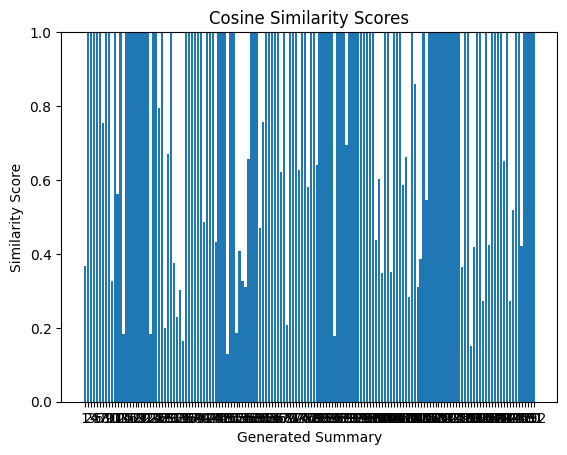

In [33]:
# Plotting the similarity scores
x_labels = [f"{i+1}" for i in range(len(list(billdf['Raw Text'])))]
plt.bar(x_labels, similarity_scores)
plt.xlabel("Generated Summary")
plt.ylabel("Similarity Score")
plt.title("Cosine Similarity Scores")
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.show()


([<matplotlib.axis.XTick at 0x23cda9a7010>,
 [Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6, 0, '0.6'),
  Text(0.7, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9'),
  Text(1.0, 0, '1.0')])

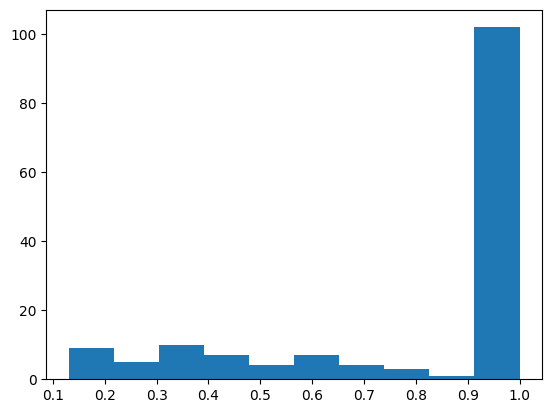

In [34]:

plt.hist(similarity_scores)
plt.xticks([0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])